In [1]:
import sys
sys.path.append('C:\\Users\\PAT\\Documents\\edwisor\\projects\\misc')

In [2]:
from misc.__init__ import *
from misc.config import *

In [3]:
data = pd.read_csv(train_data_path)
data.isnull().sum()

area        0
bedrooms    1
age         0
price       0
dtype: int64

In [4]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [5]:
import math
data['bedrooms'] = data['bedrooms'].fillna(math.floor(data['bedrooms'].median()))

In [6]:
data

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [7]:
iv=data.drop(['price'], axis=1)#way 1
iv=data[['area','bedrooms','age']]#way 2
dv = data['price'].values

print(iv)
dv

   area  bedrooms  age
0  2600       3.0   20
1  3000       4.0   15
2  3200       3.0   18
3  3600       3.0   30
4  4000       5.0    8


array([550000, 565000, 610000, 595000, 760000], dtype=int64)

In [8]:
model = LinearRegression()
model.fit(iv, dv)
dv_test_pred = model.predict([[3000,3,40]])
dv_test_pred = model.predict(iv)

In [9]:
def mape(actual, predicted):
    mape_ = np.mean(np.abs(actual-predicted)/actual)
    return mape_*100

print(100-mape(dv, dv_test_pred))#accuracy


97.5684831085138


In [139]:
# Regression chart.
def chart_regression(dv_test,dv_test_pred, sort=True):
    t = pd.DataFrame({'pred': dv_test_pred, 'actual': dv_test})
    if sort:
        t.sort_values(by=['actual'], inplace=True)
    plt.plot(t['actual'].tolist(), label='actual')
    #plt.scatter(t['actual'].tolist())
    plt.plot(t['pred'].tolist(), label='predicted')
    plt.ylabel('output')
    plt.legend()#shows x,y labels set above
    plt.show()
    


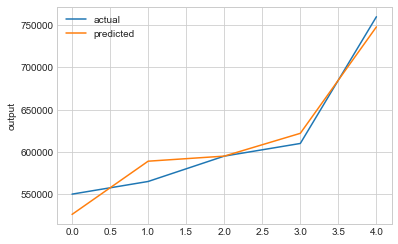

In [54]:
chart_regression(dv,dv_test_pred)

In [57]:
from sklearn.metrics import r2_score,mean_squared_error

In [61]:
r2 = r2_score(dv, dv_test_pred)
vif = 1/(1-r2)
r2,vif
#vif >5 is indicating collinaearity issue in your iv/predictor variables

(0.9488817891373804, 19.562500000000085)

In [63]:
cor = data.corr()

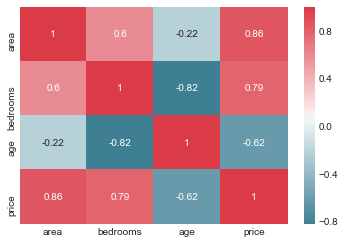

In [67]:
sb.heatmap(cor,annot=True,cmap=sb.diverging_palette(220,10,as_cmap=True))
#bedrooms is strong corr(neg) with age, lets drop age


In [16]:
iv=data.drop(['price','age'], axis=1)#way 1
#iv=data[['area','bedrooms','age']]#way 2
dv = data['price'].values
model = LinearRegression()
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size=0.3)
model.fit(iv_train, dv_train)
dv_test_pred = model.predict(iv_test)
r2 = r2_score(dv_test, dv_test_pred)
r2

-705.0000000000006

## basicaly ur aim is to get r2 of around 90 and vif<5 for good regression model

In [88]:
mean_squared_error(dv_test,dv_test_pred)

7110351562.5

In [20]:
iv_train

,area,bedrooms
2,3200,3.0
3,3600,3.0


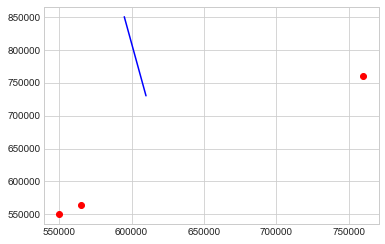

In [25]:
plt.scatter(dv_train,model.predict(iv_train),color='red')#train sets
plt.plot(dv_test,dv_test_pred,color='blue')#test predictions

# Boston dataset

In [14]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()

In [4]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
#make a dataframe
data = pd.DataFrame(data=boston.data, columns=boston.feature_names)
data['MEDV'] = boston.target

In [102]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [105]:
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14,21.6


In [9]:
from sklearn.model_selection import train_test_split
iv_train,iv_test, dv_train, dv_test = train_test_split(data.drop(['MEDV'],axis=1),data['MEDV'], test_size=0.2,shuffle=True,random_state=42)

In [15]:
model = LinearRegression()
model.fit(iv_train, dv_train)
dv_train_pred = model.predict(iv_train)
dv_test_pred = model.predict(iv_test)
r2 = r2_score(dv_test, dv_test_pred)
r2_tr = r2_score(dv_train, dv_train_pred)
r2,r2_tr
mse = mean_squared_error(dv_test,dv_test_pred),mean_squared_error(dv_train, dv_train_pred)
r2,mse
#again overfit issue

(0.6687594935356294, (24.29111947497371, 21.641412753226312))

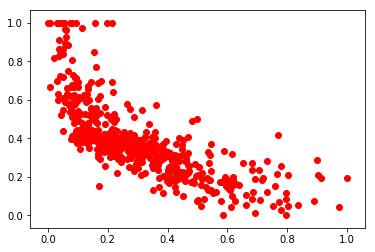

In [142]:
plt.scatter(data.LSTAT,data.MEDV,color='red')
#looks like curve will fit better than a straight line, LR wont be giving good result

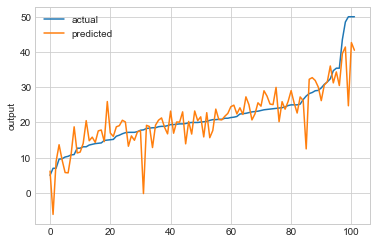

In [43]:
chart_regression(dv_test,dv_test_pred)
#LR gives more zig zag line

In [54]:
model = RandomForestRegressor(n_estimators=100).fit(iv_train,dv_train)


In [109]:
dv_test_pred = model.predict(iv_test)
mean_squared_error(dv_test,dv_test_pred)

8.669616735294118

In [110]:
from sklearn.metrics import r2_score

In [113]:
r2 = r2_score(dv_test,dv_test_pred)
vif= 1/(1-r2)
r2,vif
#vif should be less than 5

(0.8817786787797307, 8.458711082553423)

In [115]:
r2 = model.score(iv_test,dv_test)

0.8817786787797307

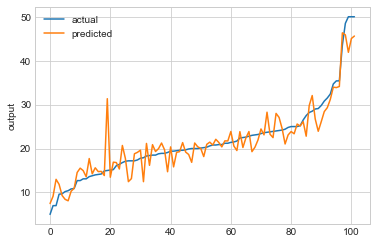

In [117]:
chart_regression(dv_test,dv_test_pred)

In [118]:
#Looks overfit, thats why vif is high
rmse = np.sqrt(mean_squared_error(dv_test,dv_test_pred))
rmse

2.9444212903886764

In [121]:
mape = np.mean(np.abs((dv_test-dv_test_pred)/dv_test))
mape*100

11.340338262363268

In [122]:
dv_train_pred = model.predict(iv_train)
rmse_train = np.sqrt(mean_squared_error(dv_train,dv_train_pred))
rmse_train

1.3476212036087298

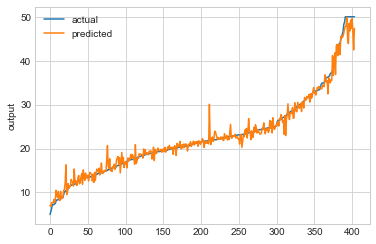

In [123]:
#fit on train data
chart_regression(dv_train,dv_train_pred)

# RMSE is more for test --> overfit problem 
Need to do feature selection and reduce the var

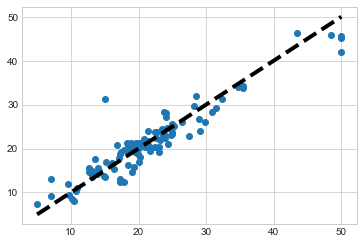

In [135]:
#fig,ax=plt.subplots()
plt.scatter(dv_test,dv_test_pred)
plt.plot([dv_test.min(),dv_test.max()],[dv_test.min(),dv_test.max()],'k--',lw=4)

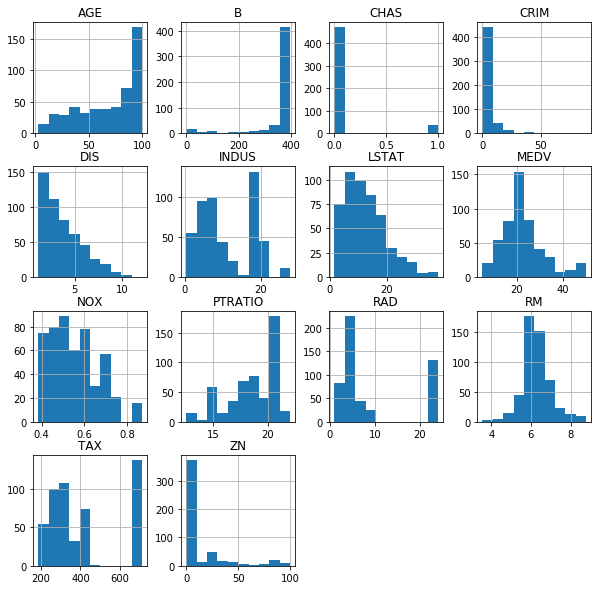

In [22]:
import matplotlib.pyplot as plt
data.hist(figsize=(10,10))
plt.show()

In [31]:
from sklearn.metrics import f1_score
iv = data.drop(['MEDV'],axis=1)
dv = data['MEDV'].values
iv_train,iv_test,dv_train,dv_test = train_test_split(iv,dv,test_size =0.2,shuffle=True,random_state=42,stratify=data['CHAS'])
#model = LinearRegression().fit(iv_train, dv_train)
#dv_test_pred = model.predict(iv_test)
#f1_score(dv_test,dv_test_pred)

In [32]:
cor = data.corr()

In [33]:
abs(cor['MEDV']).sort_values(ascending=False)

MEDV       1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

In [34]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017234BDE630>,
      dtype=object)

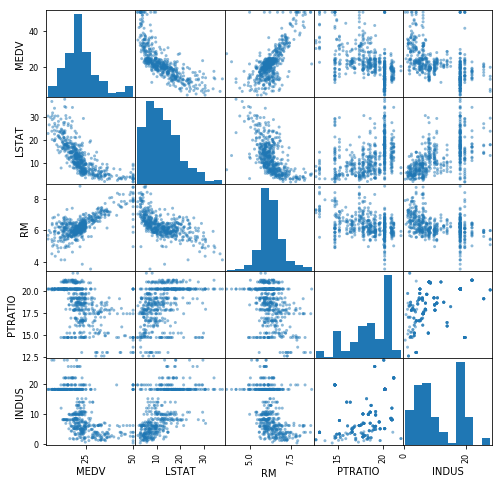

In [37]:
top_5 = abs(cor['MEDV']).nlargest(5)
df = data[top_5.index.values]
scatter_matrix(df,figsize=(8,8))

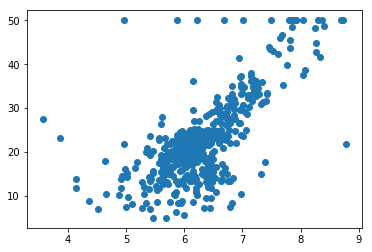

In [42]:
import seaborn as sb
plt.scatter(data['RM'],data['MEDV'])
#see the outliers

In [57]:
#set to na
data.iloc[:2,5] = np.nan

In [58]:
np.any(data.isnull().sum())

True

In [74]:
#impute
for col in data.columns:
    data.loc[:,col] = data.loc[:,col].fillna(data.loc[:,col].mean())

In [75]:
np.any(data.isnull().sum())

False

In [77]:
# see the cont and categ variables
cont = []
cat = []
for col in data.columns:
    if data.loc[:,col].dtype in ['int64','float64','int32']:
        cont.append(col)
    else:
        cat.append(col)

In [81]:
bk = data.copy() #bk=data will be a deep copy, copy() gives shallow copy, in short they are pointing to different locations

In [82]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.283788,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702472,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [85]:
cont = [col for col in cont if col not in ['MEDV']]
#for col in data.columns:
    

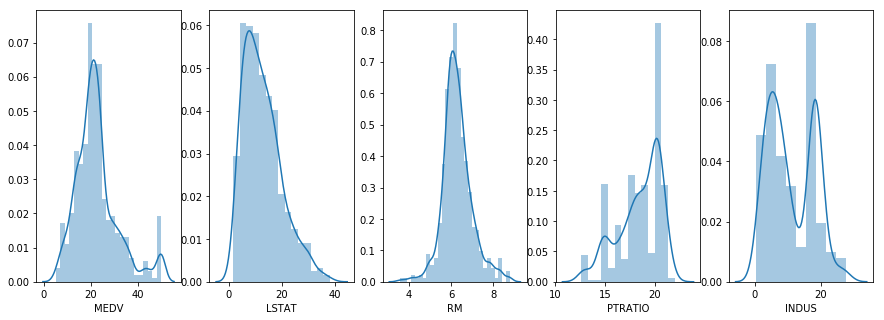

In [110]:
#lets plot distrubutions
fig,axes = plt.subplots(figsize=(15,5),ncols=len(df.columns))


for col,ax in zip(df.columns,axes):
    sb.distplot(df[col],ax=ax)
   


In [113]:
#normalization
for col in data.columns:
    data.loc[:,col] = (data.loc[:,col]-data.loc[:,col].min())/(data.loc[:,col].max()-data.loc[:,col].min())

In [135]:
model = LinearRegression()
model.fit(iv_train, dv_train)
dv_train_pred = model.predict(iv_train)
dv_test_pred = model.predict(iv_test)
r2 = r2_score(dv_test, dv_test_pred)
r2_tr = r2_score(dv_train, dv_train_pred)
r2,r2_tr
mse = mean_squared_error(dv_test,dv_test_pred),mean_squared_error(dv_train, dv_train_pred)
r2,mse
#again overfit issue

(0.7572684891063743, (17.17124049875935, 23.32234607923367))

In [116]:
model.score(iv_test,dv_test)

0.7572684891063743

In [115]:
from sklearn.tree import DecisionTreeRegressor


In [117]:
model = DecisionTreeRegressor()
model.fit(iv_train, dv_train)
dv_train_pred = model.predict(iv_train)
dv_test_pred = model.predict(iv_test)
model.score(iv_test,dv_test)

0.7628392291117401

In [120]:
model = RandomForestRegressor(n_estimators=500)
model.fit(iv_train, dv_train)
dv_train_pred = model.predict(iv_train)
dv_test_pred = model.predict(iv_test)
model.score(iv_test,dv_test)

0.8818040451820508

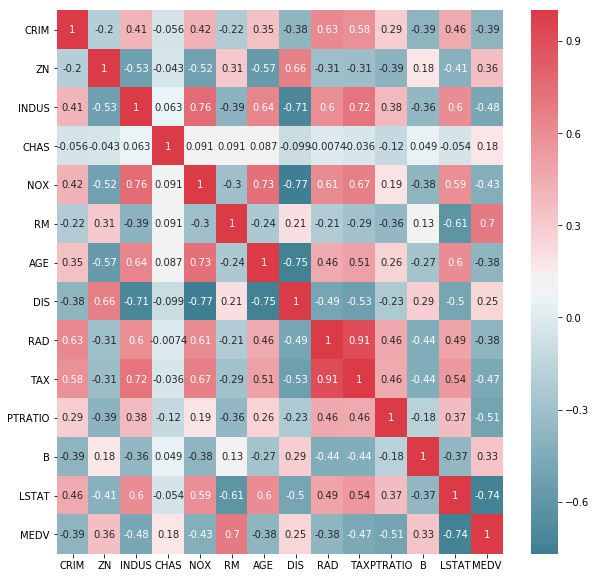

In [133]:
fig,axes = plt.subplots(figsize=(10,10))
sb.heatmap(cor,cmap=sb.diverging_palette(220,10,as_cmap=True),annot=True)

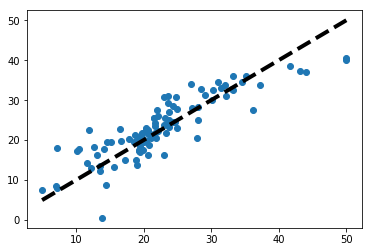

In [144]:
#fig,ax=plt.subplots()
plt.scatter(dv_test,dv_test_pred)
plt.plot([dv_test.min(),dv_test.max()],[dv_test.min(),dv_test.max()],'k--',lw=4)
#corr is good between actual and predicted

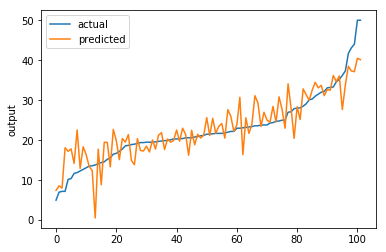

In [140]:
chart_regression(dv_test,dv_test_pred)

# Exercise:
you can remove IV which has corr>0.7 and try 